In [72]:
import numpy as np

from modules.client import OffVarianceClient
import modules.utils as utils
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [73]:
segmented_df = games_df.loc[
    (games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
    (games_df['odds_open_win1'] >= 2.8) & (games_df['odds_open_win1'] <= 8) &
    (games_df['odds_open_tb25'] >= 2) & (games_df['odds_open_tb25'] <= 2.9)
    ]

In [74]:
segmented_df['simple_expected_total_value'].shape

(141,)

<AxesSubplot:xlabel='simple_expected_total_value', ylabel='total'>

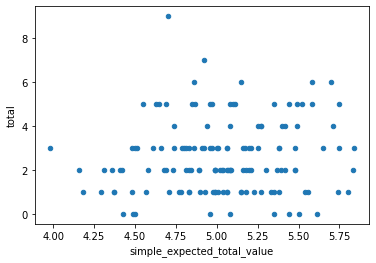

In [75]:
segmented_df.plot.scatter('simple_expected_total_value', 'total')

In [76]:
np.percentile(segmented_df['simple_expected_total_value'], 85)

5.44

In [77]:
segmented_df['simple_expected_total_value'].describe()

count    141.000000
mean       5.030071
std        0.386026
min        3.980000
25%        4.800000
50%        5.030000
75%        5.300000
max        5.840000
Name: simple_expected_total_value, dtype: float64

Count: 141
Open profit: -2.060000000000003
Close profit: -2.9899999999999984
Open ROI: -0.014609929078014207
Close ROI: -0.021205673758865236
UDI: -0.009994898964880228
AxesSubplot(0.125,0.125;0.775x0.755)


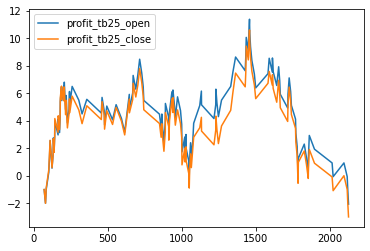

In [78]:
utils.print_total_over_result(segmented_df)

In [79]:
utils.analyze_correlation(segmented_df, 'total', utils.metrics)

,correlation
expected_goal_03_H,0.257332
paper_03_H,0.200767
expected_goal_03_H_loc,0.160284
expected_difference_H_A,0.153678
expected_difference_A_H,-0.153678
paper_03_H_loc,0.151016
sum_ufr_03,0.148987
expected_difference_03_H_A,0.139432
expected_difference_03_A_H,-0.139432
paper_03_H_plus_03_A,0.137884


In [80]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_tb25')

,low,high,diff
sum_ufr_03_loc,3.669468,4.208305,0.538837
sum_ufr_classic_loc,4.576199,5.054100,0.477901
sum_ufr_03,3.788652,4.110725,0.322073
sum_ufr_classic,4.955501,5.262635,0.307134
simple_expected_total_value_loc,4.853902,5.095500,0.241598
expected_total_loc,2.170280,2.397675,0.227395
paper_03_H_plus_03_A_loc,1.703537,1.891966,0.188429
paper_H_plus_A_loc,2.207436,2.383421,0.175984
expected_goal_03_A_loc,0.998755,1.151745,0.152990
simple_expected_total_value,4.958537,5.101500,0.142963


In [81]:
updated_segmented_df = segmented_df.loc[
(segmented_df['expected_goal_03_H'] >= 0.77) & (segmented_df['paper_03_H'] >= 0.78)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'expected_goal_03_H',
    'paper_03_H',
], 'udi_tb25')

,low,high,diff
paper_03_H,0.835678,0.911736,0.076058
expected_goal_03_H,0.994383,1.029467,0.035083


In [82]:
updated_segmented_df['expected_goal_03_H'].describe()

count    14.000000
mean      1.022000
std       0.124952
min       0.800000
25%       0.932200
50%       1.014600
75%       1.072350
max       1.251900
Name: expected_goal_03_H, dtype: float64

<AxesSubplot:>

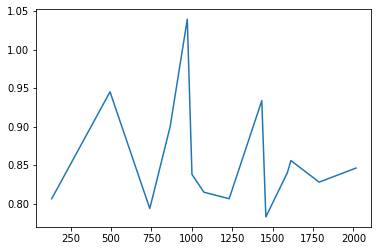

In [85]:
updated_segmented_df['paper_03_H'].plot()

Count: 3
Open profit: 3.87
Close profit: 3.4999999999999996
Open ROI: 1.29
Close ROI: 1.1666666666666665
UDI: 0.0577547973802743
AxesSubplot(0.125,0.125;0.775x0.755)


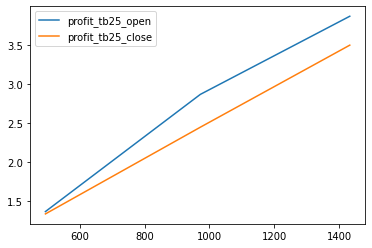

In [84]:
filtered_result_df = segmented_df.loc[
    (segmented_df['expected_goal_03_H'] >= 1.02) & (segmented_df['paper_03_H'] >= 0.91)
    ]
utils.print_total_over_result(filtered_result_df)